## Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# importing IKEA dataset
DF_IKEA = pd.read_csv('ikea_kommun_data.txt',delimiter='\t', encoding = "ISO-8859-1")

In [3]:
DF_IKEA

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0


In [4]:
DF_IKEA.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [5]:
DF_IKEA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 19.5+ KB


In [6]:
DF_IKEA.isnull().sum()

Kommun_code              0
Year                     0
Kommun_name              0
Revenue                  0
Employee                 0
Population               0
Population_University    0
Percent_University       0
Productivity             0
SalesIndex               0
Infrast                  0
Border                   0
dtype: int64

#### from above it is found that no missing values in the datasets

In [7]:
DF_IKEA.Border.unique()

array([1, 0], dtype=int64)

In [8]:
# checking the municipalities with borders
DF_IKEA.loc[DF_IKEA["Border"] == 1, "Kommun_name"].value_counts()

Haparanda    1
Tanum        1
Dals-Ed      1
Strömstad    1
Eda          1
Torsby       1
Årjäng       1
Arvika       1
Name: Kommun_name, dtype: int64

In [9]:
DF_IKEA.columns

Index(['Kommun_code', 'Year', 'Kommun_name', 'Revenue', 'Employee',
       'Population', 'Population_University', 'Percent_University',
       'Productivity', 'SalesIndex', 'Infrast', 'Border'],
      dtype='object')

In [10]:
# checking no of municipalities with infrastructures
DF_IKEA.Infrast.value_counts() 

0    197
1     10
Name: Infrast, dtype: int64

In [11]:
DF_IKEA.Border.value_counts() 

0    199
1      8
Name: Border, dtype: int64

In [12]:
DF_IKEA.loc[DF_IKEA["Border"] == 1, "Kommun_name"].value_counts()

Haparanda    1
Tanum        1
Dals-Ed      1
Strömstad    1
Eda          1
Torsby       1
Årjäng       1
Arvika       1
Name: Kommun_name, dtype: int64

In [13]:
# assigning the values for the X
X_value = ['Revenue', 'Employee', 'Population', 'Population_University','Percent_University', 'Productivity','SalesIndex','Infrast','Border']


In [14]:
x = DF_IKEA.loc[:, X_value].values

In [15]:
y = DF_IKEA.loc[:,['Kommun_name']].values

In [16]:
# scaling of X 
x = StandardScaler().fit_transform(x)

In [17]:
scaled_DF_IKEA = pd.DataFrame(data = x, columns = X_value).head()
scaled_DF_IKEA

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,0.017184,-0.169244,-0.366968,-0.274285,-0.639005,3.738817,0.017184,-0.225303,4.987484
1,1.025973,0.752206,0.423730,0.282274,1.015597,0.922074,1.025973,-0.225303,-0.200502
2,1.312392,0.950198,0.767521,0.601858,1.419745,1.010780,1.312392,-0.225303,-0.200502
3,0.124312,0.126716,0.071126,-0.016780,0.369223,0.187793,0.124312,-0.225303,-0.200502
4,-0.320194,-0.290506,-0.066387,-0.056867,0.741587,-0.175330,-0.320194,-0.225303,-0.200502


In [18]:
x

array([[ 0.0171844 , -0.16924445, -0.36696823, ...,  0.0171844 ,
        -0.22530295,  4.98748434],
       [ 1.02597326,  0.75220563,  0.42373029, ...,  1.02597326,
        -0.22530295, -0.20050188],
       [ 1.31239193,  0.9501975 ,  0.76752138, ...,  1.31239193,
        -0.22530295, -0.20050188],
       ...,
       [ 1.93284171,  1.6935234 ,  1.51252197, ...,  1.93284171,
        -0.22530295, -0.20050188],
       [-0.32726194, -0.291191  , -0.21113965, ..., -0.32726194,
        -0.22530295, -0.20050188],
       [-0.33693322, -0.31379907, -0.34869805, ..., -0.33693322,
        -0.22530295, -0.20050188]])

In [19]:
scaled_DF_IKEA.describe()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.431934,0.273874,0.165805,0.107240,0.581430,1.136827,0.431934,-0.225303,0.837095
std,0.700078,0.552890,0.440259,0.340278,0.782850,1.537431,0.700078,0.000000,2.320138
min,-0.320194,-0.290506,-0.366968,-0.274285,-0.639005,-0.175330,-0.320194,-0.225303,-0.200502
25%,0.017184,-0.169244,-0.066387,-0.056867,0.369223,0.187793,0.017184,-0.225303,-0.200502
50%,0.124312,0.126716,0.071126,-0.016780,0.741587,0.922074,0.124312,-0.225303,-0.200502
75%,1.025973,0.752206,0.423730,0.282274,1.015597,1.010780,1.025973,-0.225303,-0.200502
max,1.312392,0.950198,0.767521,0.601858,1.419745,3.738817,1.312392,-0.225303,4.987484


In [20]:
#PCA Projection to 2D

In [21]:
pca = PCA(.95) #used 95% as per the requirement

In [22]:
principalComponents = pca.fit_transform(x)

In [23]:
principalComponents

array([[-0.44213657,  6.22005276, -0.0468619 , -0.48632822,  0.64842766],
       [ 1.74872404,  0.38275978, -1.05693289,  0.39770379,  0.10346562],
       [ 2.45794831,  0.38720789, -1.30315164,  0.35491766,  0.2438901 ],
       ...,
       [ 3.71028818,  0.11339125, -0.93733458, -0.18934761, -0.31111736],
       [-0.75878476, -0.40575082,  0.21241634, -0.20978892, -0.32909114],
       [-0.85387706,  0.08416435,  0.06415947,  0.26883873, -0.48116306]])

In [24]:
principalDF_IKEA = pd.DataFrame(data = principalComponents)

In [25]:
pca.n_components_

5

In [26]:
principalDF_IKEA.head(10)

,0,1,2,3,4
0,-0.442137,6.220053,-0.046862,-0.486328,0.648428
1,1.748724,0.382760,-1.056933,0.397704,0.103466
2,2.457948,0.387208,-1.303152,0.354918,0.243890
3,0.243091,-0.066118,-0.469815,0.106233,0.049251
4,-0.325750,-0.412781,-0.566916,-0.065218,0.563203
5,-0.041519,-0.320049,-0.590015,-0.025364,0.456968
6,0.100917,-0.013722,-0.680112,0.238223,0.310660
7,2.320191,0.701333,-1.148291,0.594558,-0.154385
8,-0.264508,-1.100277,-0.622369,-0.658175,1.128230
9,3.407600,1.320171,-1.353722,1.004630,-0.615663


In [27]:
Sum_of_squared = []
K = range(1,25)
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(principalComponents)
    Sum_of_squared.append(model.inertia_)
    
Sum_of_squared

[1848.1616851746076,
 1060.3889870967887,
 803.0049367558603,
 590.2256432955385,
 427.7345023608621,
 358.10951035453473,
 298.2573112701932,
 253.6138623242199,
 209.8341837239496,
 185.55922704658042,
 162.8919692579642,
 142.48946371650032,
 125.70254003228686,
 113.31425905430883,
 105.00477172845565,
 93.20216479022959,
 91.02575682699987,
 83.77341904227771,
 78.65926334188589,
 72.45787465299463,
 68.52853007964097,
 64.79350689462369,
 61.86567139917649,
 57.60734669777384]

#### checking with the elbow plot to choose k

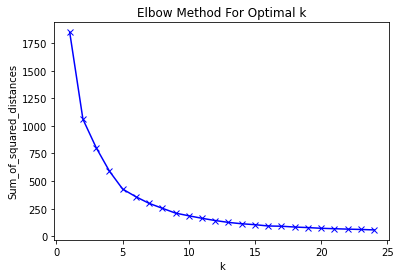

In [28]:
plt.plot(K, Sum_of_squared, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

C:\Users\Maha Vajeeshwaran\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


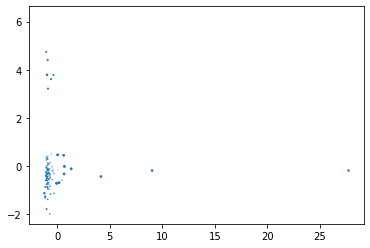

In [29]:
plt.scatter(principalComponents[:,0],principalComponents[:,1],principalComponents[:,2], label='True Position')


In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(principalComponents)

KMeans(n_clusters=3)

In [31]:
kmeans.cluster_centers_

array([[-5.46981563e-01, -1.62663259e-02,  1.49894669e-01,
        -3.35844037e-02, -7.02582038e-02],
       [ 2.77200231e+01, -1.76935943e-01,  1.98288515e+00,
        -1.93315146e+00, -2.80484165e+00],
       [ 2.38261081e+00,  1.05381918e-01, -9.83249710e-01,
         2.71641066e-01,  5.25535990e-01]])

In [32]:
# predicted clusters
kmeans.labels_

array([0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0])

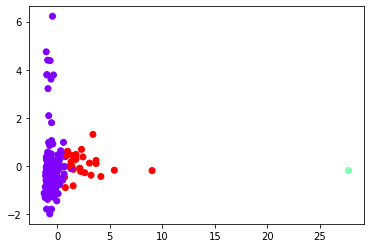

In [33]:
# visualizing the clusters
plt.scatter(principalComponents[:,0],principalComponents[:,1], c=kmeans.labels_, cmap='rainbow')


#### from the above all the municipalities divided into three clusters in that cluster 2 only one municipality fall far from all other clusters

C:\Users\Maha Vajeeshwaran\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


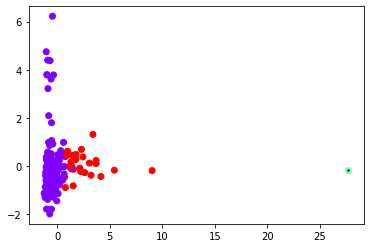

In [34]:
plt.scatter(principalComponents[:,0],principalComponents[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], color='black')


In [35]:
# Creating the new data frame byconcatenating the PCA scores
DF_IKEA = pd.concat([DF_IKEA.reset_index(drop = True), pd.DataFrame(principalComponents)], axis = 1)
DF_IKEA

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,0,1,2,3,4
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,-0.442137,6.220053,-0.046862,-0.486328,0.648428
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1.748724,0.382760,-1.056933,0.397704,0.103466
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,2.457948,0.387208,-1.303152,0.354918,0.243890
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0.243091,-0.066118,-0.469815,0.106233,0.049251
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,-0.325750,-0.412781,-0.566916,-0.065218,0.563203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0,-1.081563,-0.259529,0.564679,-0.133188,-0.808584
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0,-1.027274,0.381434,0.192622,0.517261,-0.823397
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0,3.710288,0.113391,-0.937335,-0.189348,-0.311117
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0,-0.758785,-0.405751,0.212416,-0.209789,-0.329091


In [36]:
DF_IKEA.columns.values[-5: ] = ['PCA1', 'PCA2', 'PCA3', 'PCA4','PCA5']


In [37]:
DF_IKEA

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PCA1,PCA2,PCA3,PCA4,PCA5
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,-0.442137,6.220053,-0.046862,-0.486328,0.648428
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1.748724,0.382760,-1.056933,0.397704,0.103466
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,2.457948,0.387208,-1.303152,0.354918,0.243890
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0.243091,-0.066118,-0.469815,0.106233,0.049251
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,-0.325750,-0.412781,-0.566916,-0.065218,0.563203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0,-1.081563,-0.259529,0.564679,-0.133188,-0.808584
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0,-1.027274,0.381434,0.192622,0.517261,-0.823397
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0,3.710288,0.113391,-0.937335,-0.189348,-0.311117
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0,-0.758785,-0.405751,0.212416,-0.209789,-0.329091


In [38]:
# concatinating clusters to the dataframe
DF_IKEA['clusters'] =kmeans.labels_

In [39]:
DF_IKEA

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PCA1,PCA2,PCA3,PCA4,PCA5,clusters
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,-0.442137,6.220053,-0.046862,-0.486328,0.648428,0
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1.748724,0.382760,-1.056933,0.397704,0.103466,2
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,2.457948,0.387208,-1.303152,0.354918,0.243890,2
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0.243091,-0.066118,-0.469815,0.106233,0.049251,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,-0.325750,-0.412781,-0.566916,-0.065218,0.563203,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0,-1.081563,-0.259529,0.564679,-0.133188,-0.808584,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0,-1.027274,0.381434,0.192622,0.517261,-0.823397,0
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0,3.710288,0.113391,-0.937335,-0.189348,-0.311117,2
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0,-0.758785,-0.405751,0.212416,-0.209789,-0.329091,0


In [40]:
DF_IKEA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
 12  PCA1                   207 non-null    float64
 13  PCA2                   207 non-null    float64
 14  PCA3                   207 non-null    float64
 15  PCA4  

In [41]:
DF_IKEA.groupby('clusters').describe()

Kommun_code                                                         \
               count         mean         std    min    25%     50%     75%   
clusters                                                                      
0              177.0  1089.242938  524.367750  114.0  643.0  1266.0  1465.0   
1                1.0   180.000000         NaN  180.0  180.0   180.0   180.0   
2               29.0   838.586207  585.173998  123.0  184.0   780.0  1380.0   

                   Year          ...      PCA4             PCA5            \
             max  count    mean  ...       75%       max  count      mean   
clusters                         ...                                        
0         2583.0  177.0  2010.0  ...  0.277922  4.510091  177.0 -0.070258   
1          180.0    1.0  2010.0  ... -1.933151 -1.933151    1.0 -2.804842   
2         1880.0   29.0  2010.0  ...  0.551557  1.496642   29.0  0.525536   

                                                                      
               std       min       25%       50%       75%       max  
clusters                                                              
0         0.703554 -1.218440 -0.551702 -0.291453  0.177346  2.217982  
1              NaN -2.804842 -2.804842 -2.804842 -2.804842 -2.804842  
2         1.071328 -0.978216 -0.311117  0.285973  1.262009  3.184815  

[3 rows x 128 columns]

In [42]:
DF_IKEA["clusters"].value_counts()

0    177
2     29
1      1
Name: clusters, dtype: int64

#### From above we can notice that cluster 1 has 176 kommun and 0 has 30 kommun and cluster 2 has 1 kommun

In [43]:
# Adding a new column has_ikea, Kommun_code, Year and Kommun_name to the dataset
DF_IKEA['has_ikea'] = DF_IKEA['Kommun_name'].map({'Borlänge':1,'Gävle':1,'Göteborg':1,'Haparanda':1,'Helsingborg':1,'Jönköping':1,'Kalmar':1,'Karlstad':1,
    'Linköping':1,'Malmö':1,'Stockholm':1,'Sundsvall':1,'Uddevalla':1,'Umeå':1,'Uppsala':1,'Västerås':1,'Älmhult':1,
    'Mölndal':1,'Örebro':1})

In [44]:
# replacing NaN in has_ikea column with 0
DF_IKEA['has_ikea'] = DF_IKEA['has_ikea'].fillna('0').astype(int)

In [45]:
# Shows Kommun with has_ikea = 0 (kommun with no ikea)
DF_IKEA[(DF_IKEA["has_ikea"] == 0)]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PCA1,PCA2,PCA3,PCA4,PCA5,clusters,has_ikea
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0.243091,-0.066118,-0.469815,0.106233,0.049251,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,-0.325750,-0.412781,-0.566916,-0.065218,0.563203,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,-0.041519,-0.320049,-0.590015,-0.025364,0.456968,0,0
6,120,2010,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0,0.100917,-0.013722,-0.680112,0.238223,0.310660,0,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,2.320191,0.701333,-1.148291,0.594558,-0.154385,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1862,2010,Degerfors,56,27,9641,483,0.050099,103.94367,5.770170,0,0,-1.015411,0.336344,0.276177,0.454812,-0.898899,0,0
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0,-1.081563,-0.259529,0.564679,-0.133188,-0.808584,0,0
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0,-1.027274,0.381434,0.192622,0.517261,-0.823397,0,0
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0,-0.758785,-0.405751,0.212416,-0.209789,-0.329091,0,0


In [46]:
# Shows Kommun with has_ikea = 1 (kommun with ikea)
DF_IKEA[(DF_IKEA["has_ikea"] == 1)]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PCA1,PCA2,PCA3,PCA4,PCA5,clusters,has_ikea
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,-0.442137,6.220053,-0.046862,-0.486328,0.648428,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1.748724,0.382760,-1.056933,0.397704,0.103466,2,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,2.457948,0.387208,-1.303152,0.354918,0.243890,2,1
19,180,2010,Stockholm,32897,18795,847073,191585,0.226173,87.71780,3389.665819,1,0,27.720023,-0.176936,1.982885,-1.933151,-2.804842,1,1
33,380,2010,Uppsala,7042,3391,197787,40476,0.204644,104.07394,725.598890,0,0,5.442944,-0.163547,-1.743425,-0.477849,0.505683,2,1
52,580,2010,Linköping,5348,2280,146416,26023,0.177733,117.55208,551.051245,0,0,3.702124,0.238866,-1.570497,0.110772,0.397899,2,1
64,680,2010,Jönköping,5298,2556,127382,16750,0.131494,103.87831,545.899307,0,0,3.081639,0.131171,-0.771423,-0.109946,-0.385939,2,1
75,765,2010,Älmhult,847,853,15603,1511,0.096840,49.76318,87.273823,0,0,-0.304036,-1.119548,0.312140,-0.942990,-0.030222,0,1
117,1280,2010,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,9.035570,-0.179415,2.308420,1.093747,1.184861,2,1
120,1283,2010,Helsingborg,5528,3244,129177,16395,0.126919,85.40061,569.598220,1,0,4.164642,-0.425601,2.946930,1.496642,1.713230,2,1


In [47]:
pd.set_option('display.max_rows', None)

In [48]:
# Shows kommun with has_ikea = 0 and Cluster == 0 sorted by Revenue and Population
DF_IKEA[(DF_IKEA["has_ikea"] == 0) & (DF_IKEA["clusters"] == 0)].sort_values(["Revenue" , "Population"], ascending=[False,False])

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PCA1,PCA2,PCA3,PCA4,PCA5,clusters,has_ikea
171,1488,2010,Trollhättan,2004,1038,55248,5812,0.105198,96.75516,206.489659,0,0,0.644286,-0.014975,-0.363461,0.054903,-0.218238,0,0
98,1231,2010,Burlöv,1962,928,16701,1639,0.098138,105.95581,202.162031,0,0,0.208573,0.244729,-0.384869,0.342613,-0.281224,0,0
38,480,2010,Nyköping,1642,708,51644,5487,0.106247,116.22877,169.189631,0,0,0.447231,0.429233,-0.620213,0.547544,-0.176117,0,0
133,1383,2010,Varberg,1639,1109,58084,6151,0.105898,74.06639,168.880514,0,0,0.533401,-0.568620,-0.095805,-0.478342,-0.119369,0,0
90,980,2010,Gotland,1542,767,57269,6203,0.108313,100.75411,158.885755,1,0,1.341523,-0.103314,2.955158,2.253047,2.125834,0,0
10,127,2010,Botkyrka,1469,530,82608,8023,0.097121,138.90558,151.363926,0,0,0.609367,0.989819,-0.770109,1.064700,-0.439968,0,0
12,136,2010,Haninge,1459,1031,77054,6776,0.087938,70.92027,150.333539,0,0,0.485033,-0.577227,0.186885,-0.546726,-0.460284,0,0
103,1261,2010,Kävlinge,1455,559,29013,3911,0.134802,130.44425,149.921384,0,0,0.344600,0.643437,-1.185714,0.901194,0.407028,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0.243091,-0.066118,-0.469815,0.106233,0.049251,0,0
169,1486,2010,Strömstad,1281,667,11808,1071,0.090701,96.24918,131.992641,0,1,-0.342856,3.785665,0.898688,-2.882292,1.229125,0,0


In [49]:
pd.set_option('display.max_rows', None)

In [50]:
# Shows kommun with has_ikea = 0 and Cluster == 1 sorted by Revenue and Population
DF_IKEA[(DF_IKEA["has_ikea"] == 0) & (DF_IKEA["clusters"] == 1)].sort_values(["Revenue" , "Population"], ascending=[False,False])

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PCA1,PCA2,PCA3,PCA4,PCA5,clusters,has_ikea


In [51]:
# Shows kommun with has_ikea = 0 and Cluster == 1 sorted by Revenue and Population
DF_IKEA[(DF_IKEA["has_ikea"] == 0) & (DF_IKEA["clusters"] == 2)].sort_values(["Revenue" , "Population"], ascending=[False,False])

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PCA1,PCA2,PCA3,PCA4,PCA5,clusters,has_ikea
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,3.407600,1.320171,-1.353722,1.004630,-0.615663,2,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,2.320191,0.701333,-1.148291,0.594558,-0.154385,2,0
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,2.629080,-0.266400,-0.263145,-0.513887,-0.624222,2,0
132,1382,2010,Falkenberg,4395,2035,41008,3396,0.082813,108.23513,452.855314,0,0,1.430147,0.445708,-0.181114,0.244600,-0.978216,2,0
16,160,2010,Täby,3441,1546,63789,13442,0.210726,111.54470,354.556345,0,0,2.156778,-0.078626,-1.968822,0.187503,1.506926,2,0
118,1281,2010,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0,3.226276,-0.370061,-2.680541,-0.027401,2.372105,2,0
173,1490,2010,Borås,3365,1486,103294,10919,0.105708,113.48541,346.725400,0,0,1.703537,0.411189,-0.560602,0.312584,-0.536148,2,0
77,780,2010,Växjö,3268,1315,83005,12266,0.147774,124.54608,336.730641,0,0,1.793872,0.490366,-1.272427,0.557442,0.285973,2,0
130,1380,2010,Halmstad,3196,1437,91800,11604,0.126405,111.46121,329.311851,0,0,1.694977,0.269589,-0.819462,0.259644,-0.100482,2,0
21,182,2010,Nacka,3104,1489,90108,17871,0.198329,104.47221,319.832286,0,0,2.246896,-0.216383,-1.711742,-0.005722,1.262009,2,0


#### From the above it is found that cluster 1 is Stockholm and it already had ikea 
#### As per the above the cluster 2 and cluster 0 kommun doesn't have ikea because it is filtered with the has_ikea = 0

In [52]:
pd.set_option('display.max_rows', None)

In [53]:
DF_IKEA

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PCA1,PCA2,PCA3,PCA4,PCA5,clusters,has_ikea
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,-0.442137,6.220053,-0.046862,-0.486328,0.648428,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1.748724,0.382760,-1.056933,0.397704,0.103466,2,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,2.457948,0.387208,-1.303152,0.354918,0.243890,2,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0.243091,-0.066118,-0.469815,0.106233,0.049251,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,-0.325750,-0.412781,-0.566916,-0.065218,0.563203,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,-0.041519,-0.320049,-0.590015,-0.025364,0.456968,0,0
6,120,2010,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0,0.100917,-0.013722,-0.680112,0.238223,0.310660,0,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,2.320191,0.701333,-1.148291,0.594558,-0.154385,2,0
8,125,2010,Ekerö,144,116,25410,3893,0.153207,62.21259,14.837580,0,0,-0.264508,-1.100277,-0.622369,-0.658175,1.128230,0,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,3.407600,1.320171,-1.353722,1.004630,-0.615663,2,0


#### Conclusion

* Based on the above clustering analysis, I propose Ikea to open new store in Huddinge, Norrkoping, and Trolhattan, as Huddinge has the greatest revenue and salesindex while having a lower population than Norrkoping. I propose Trolhattan over Jarfalla from cluster 0 to avoid having all new stores open in the same cluster and also in reality Jarfalla already had IKEA . 

* I will conclude by advising Ikea to open first in Norrkoping municipality,  Huddinge kommun people can travel to Norrkoping or stockholm as like Borlange IKEA shared by Falun and other nearby kommun people  and then open a store in Huddinge municipality, and finally in Trolhattan municipality.